In [15]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

import spacy
from nltk.tokenize import TreebankWordTokenizer

In [16]:
with open('key_events_20th_century.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [17]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text.lower())

# Basic stop word list
basic_stopwords = {
    'the', 'and', 'in', 'of', 'to', 'was', 'with', 'by', 'on', 'for', 'a', 'an', 
    'as', 'at', 'from', 'it', 'that', 'this', 'is', 'were', 'be'
}

# Remove punctuation and stopwords
tokens_clean = [word for word in tokens if word not in basic_stopwords and word not in string.punctuation]

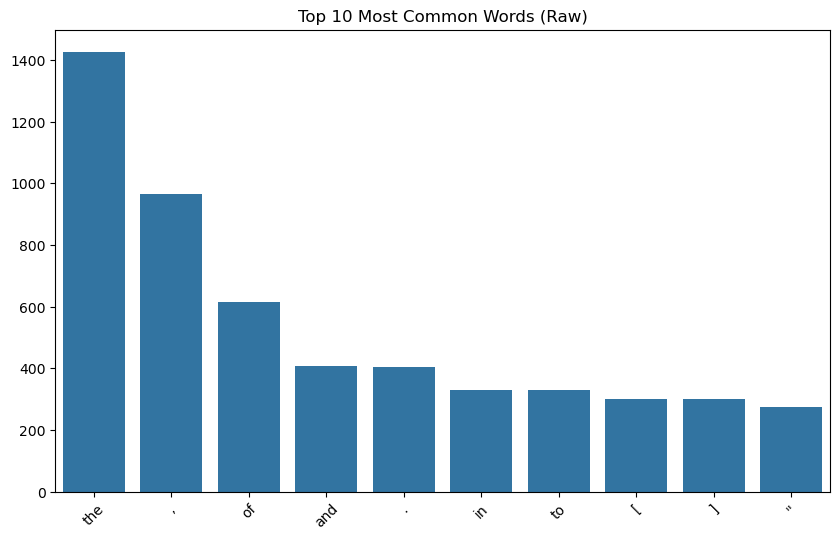

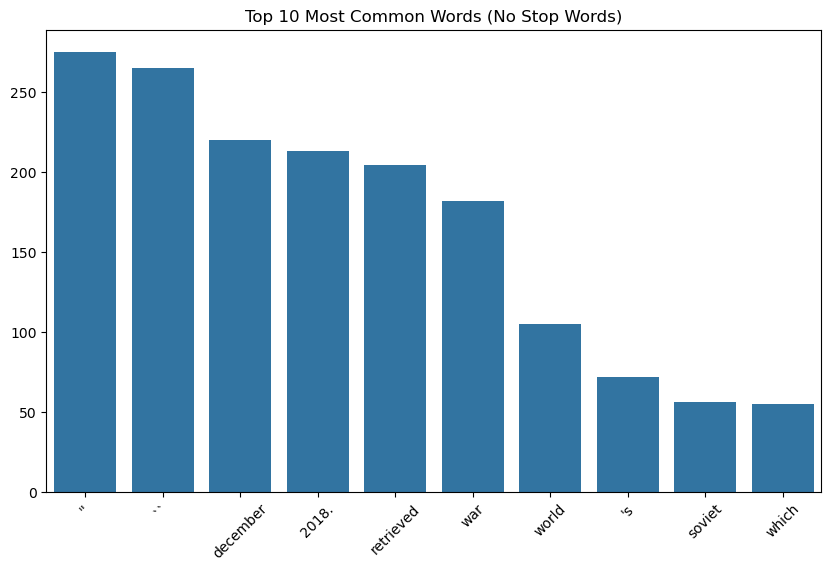

In [18]:
# Raw
raw_counts = Counter(tokens).most_common(10)
words, counts = zip(*raw_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Common Words (Raw)')
plt.xticks(rotation=45)
plt.show()

# Cleaned
clean_counts = Counter(tokens_clean).most_common(10)
words_clean, counts_clean = zip(*clean_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words_clean), y=list(counts_clean))
plt.title('Top 10 Most Common Words (No Stop Words)')
plt.xticks(rotation=45)
plt.show()


# Removing stop words dramatically shifts the focus from generic language to actual content, like "war", "century", or country names.

In [19]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text.lower())

# Extract word and POS tag (excluding punctuation and spaces)
tags = [(token.text, token.pos_) for token in doc if not token.is_punct and not token.is_space]

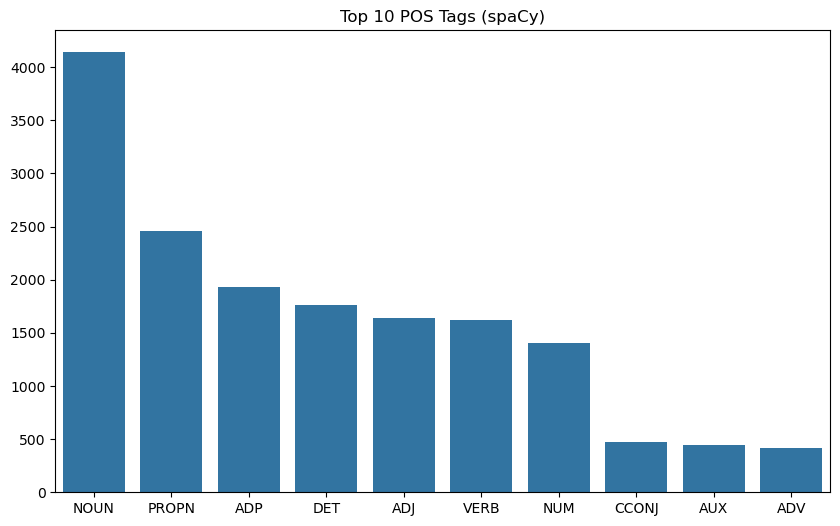

In [20]:
pos_counts = Counter(tag for word, tag in tags)
top_10_pos = pos_counts.most_common(10)

labels, counts = zip(*top_10_pos)
plt.figure(figsize=(10,6))
sns.barplot(x=list(labels), y=list(counts))
plt.title('Top 10 POS Tags (spaCy)')
plt.show()


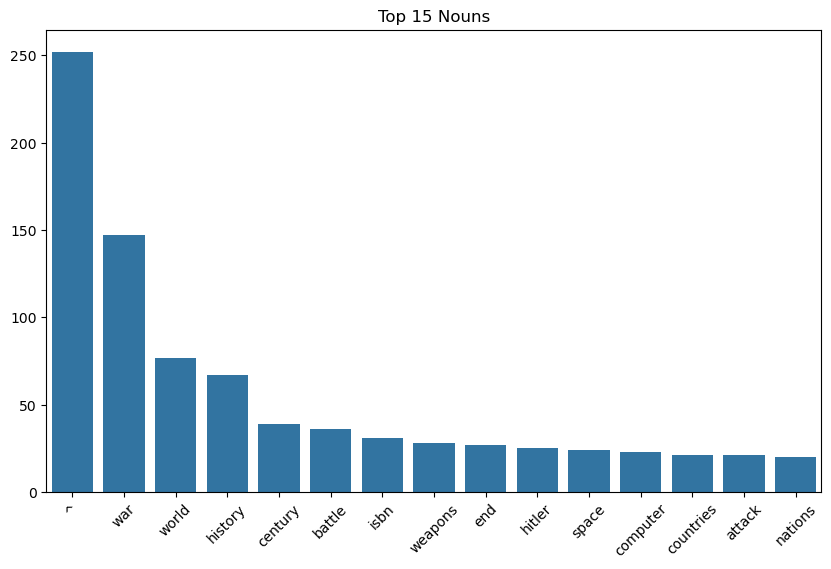

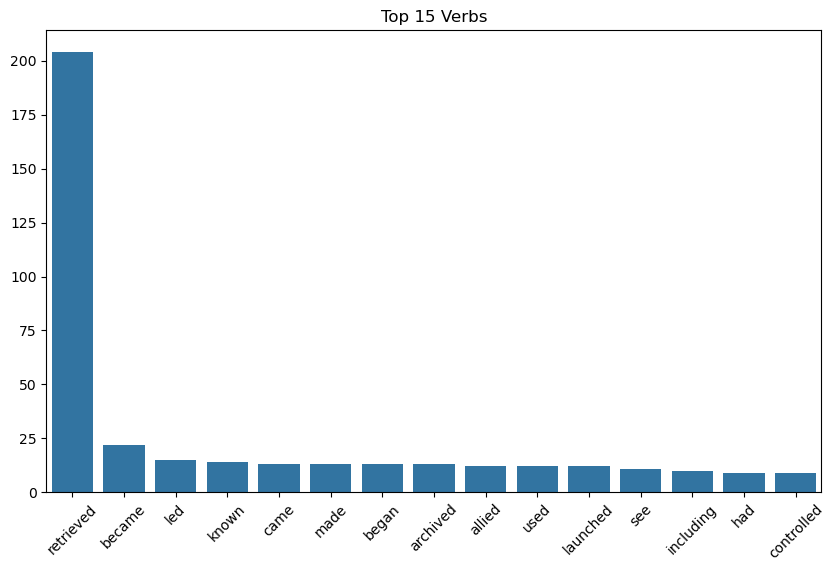

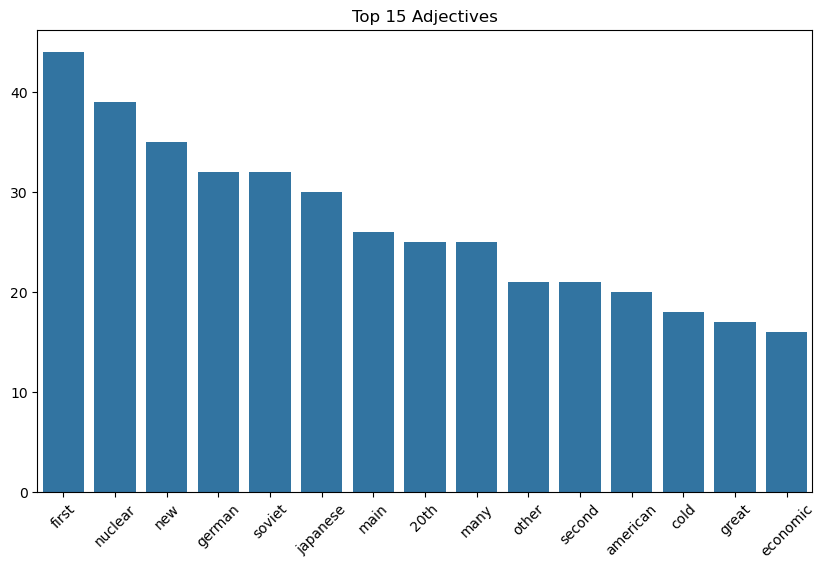

In [21]:
# Helper to filter by POS
def get_top_words(pos_code):
    return Counter(token.text for token in doc if token.pos_ == pos_code and not token.is_punct).most_common(15)

# Nouns
top_nouns = get_top_words('NOUN')
words, freqs = zip(*top_nouns)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(freqs))
plt.title('Top 15 Nouns')
plt.xticks(rotation=45)
plt.show()

# Verbs
top_verbs = get_top_words('VERB')
words, freqs = zip(*top_verbs)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(freqs))
plt.title('Top 15 Verbs')
plt.xticks(rotation=45)
plt.show()

# Adjectives
top_adjs = get_top_words('ADJ')
words, freqs = zip(*top_adjs)
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(freqs))
plt.title('Top 15 Adjectives')
plt.xticks(rotation=45)
plt.show()


# Nouns and verbs clearly reflect historical action and entities â€” like "war", "nations", or "fight". The adjectives give insight into how those events are emotionally framed.

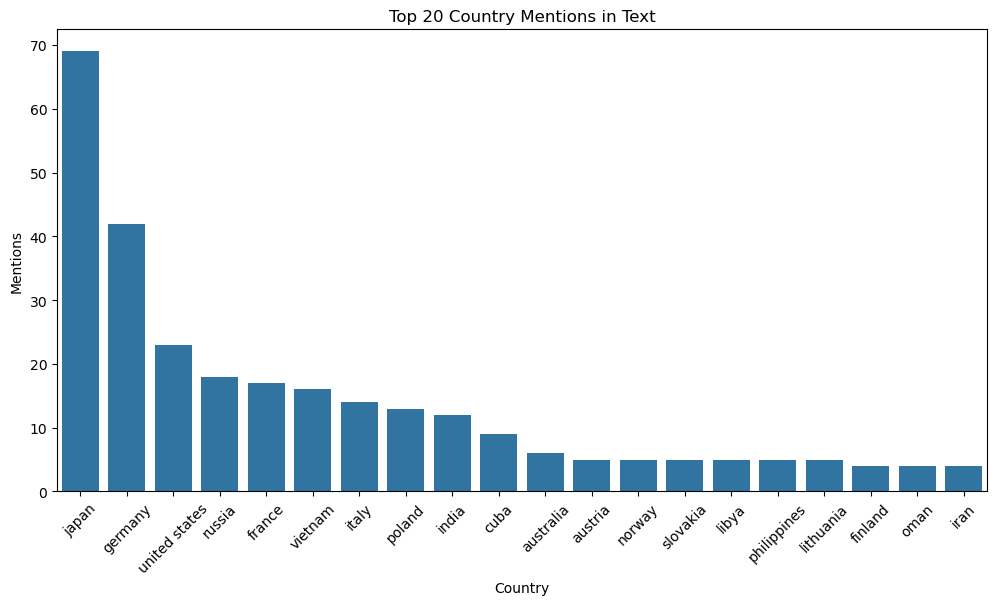

In [36]:
# Load country list from CSV
country_df = pd.read_csv('countries_list_20th_century_1.5.csv')
countries = [name.strip().lower() for name in country_df['country_name'].dropna()]
with open('key_events_20th_century.txt', 'r', encoding='utf-8') as file:
    text = file.read().lower()  # lowercase for matching


# Count mentions
country_counts = Counter()
for country in countries:
    if country in text:
        country_counts[country] = text.count(country)

# Convert to DataFrame and plot
df_mentions = pd.DataFrame(country_counts.items(), columns=['Country', 'Mentions'])
df_mentions = df_mentions.sort_values(by='Mentions', ascending=False)

if not df_mentions.empty:
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_mentions.head(20), x='Country', y='Mentions')
    plt.title('Top 20 Country Mentions in Text')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No countries from the list were found in the text.")


# The frequent mentions of countries like the US, Germany, and USSR match key roles in 20th-century global events like the World Wars and Cold War.